# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 11
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...


In [4]:
#loc = "C:/Users/nihar/OneDrive/Desktop/Forage/British_Airways/Data/BA_reviews.csv"
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.head()

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1100 non-null   object
dtypes: object(1)
memory usage: 8.7+ KB


In [7]:
df.tail()

,reviews
1095,✅ Trip Verified | Bermuda to Gatwick. Usual w...
1096,✅ Trip Verified | Aberdeen to Boston via Lond...
1097,✅ Trip Verified | London to Hamburg. Baggage ...
1098,✅ Trip Verified | Flew London Heathrow to Hong...
1099,✅ Trip Verified | Flew to Istanbul with Britis...


In [8]:
df['reviews'] = df['reviews'].str.split('|').str[1].str.strip()

In [9]:
df.head()

,reviews
0,Everything was ok until our connecting flight ...
1,My initial flight was cancelled 8 hours prior ...
2,We will never fly British Airways again. Our f...
3,Check in and security clearance very quick at ...
4,British Airways has confirmed itself as the wo...


# Data Cleaning
1. Lower case conversion

In [10]:
df['reviews'] = df['reviews'].str.lower()

In [11]:
df.head()

,reviews
0,everything was ok until our connecting flight ...
1,my initial flight was cancelled 8 hours prior ...
2,we will never fly british airways again. our f...
3,check in and security clearance very quick at ...
4,british airways has confirmed itself as the wo...


In [12]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nihar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nihar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Removing special characters and punctuations

In [13]:
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [14]:
df.head()

,reviews
0,everything was ok until our connecting flight ...
1,my initial flight was cancelled 8 hours prior ...
2,we will never fly british airways again our fl...
3,check in and security clearance very quick at ...
4,british airways has confirmed itself as the wo...


3. Tokenization

In [15]:
df['tokens'] = df['reviews'].apply(lambda x: word_tokenize(x))

In [16]:
df.head()

,reviews,tokens
0,everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ..."
1,my initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, 8, hours..."
2,we will never fly british airways again our fl...,"[we, will, never, fly, british, airways, again..."
3,check in and security clearance very quick at ...,"[check, in, and, security, clearance, very, qu..."
4,british airways has confirmed itself as the wo...,"[british, airways, has, confirmed, itself, as,..."


4. Removing stop words

In [17]:
stop_words = set(stopwords.words('english'))


In [18]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,reviews,tokens,filtered_tokens
0,everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, ok, connecting, flight, london, t..."
1,my initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, 8, hours...","[initial, flight, cancelled, 8, hours, prior, ..."
2,we will never fly british airways again our fl...,"[we, will, never, fly, british, airways, again...","[never, fly, british, airways, flight, july, 1..."
3,check in and security clearance very quick at ...,"[check, in, and, security, clearance, very, qu...","[check, security, clearance, quick, lhr, t5, w..."
4,british airways has confirmed itself as the wo...,"[british, airways, has, confirmed, itself, as,...","[british, airways, confirmed, worst, airline, ..."


5. Lemmetization

Stemming - chops off the words without any backgorund
Lemmetization - context analysis based chopping more accurate

In [19]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nihar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df.head()

,reviews,tokens,filtered_tokens,lemmatized_tokens
0,everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, ok, connecting, flight, london, t...","[everything, ok, connecting, flight, london, t..."
1,my initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, 8, hours...","[initial, flight, cancelled, 8, hours, prior, ...","[initial, flight, cancelled, 8, hour, prior, f..."
2,we will never fly british airways again our fl...,"[we, will, never, fly, british, airways, again...","[never, fly, british, airways, flight, july, 1...","[never, fly, british, airway, flight, july, 15..."
3,check in and security clearance very quick at ...,"[check, in, and, security, clearance, very, qu...","[check, security, clearance, quick, lhr, t5, w...","[check, security, clearance, quick, lhr, t5, w..."
4,british airways has confirmed itself as the wo...,"[british, airways, has, confirmed, itself, as,...","[british, airways, confirmed, worst, airline, ...","[british, airway, confirmed, worst, airline, u..."


In [21]:
df.tail()

,reviews,tokens,filtered_tokens,lemmatized_tokens
1095,bermuda to gatwick usual window and aisle seat...,"[bermuda, to, gatwick, usual, window, and, ais...","[bermuda, gatwick, usual, window, aisle, seat,...","[bermuda, gatwick, usual, window, aisle, seat,..."
1096,aberdeen to boston via london heathrow i found...,"[aberdeen, to, boston, via, london, heathrow, ...","[aberdeen, boston, via, london, heathrow, foun...","[aberdeen, boston, via, london, heathrow, foun..."
1097,london to hamburg baggage selfcheckin was diab...,"[london, to, hamburg, baggage, selfcheckin, wa...","[london, hamburg, baggage, selfcheckin, diabol...","[london, hamburg, baggage, selfcheckin, diabol..."
1098,flew london heathrow to hong kong with british...,"[flew, london, heathrow, to, hong, kong, with,...","[flew, london, heathrow, hong, kong, british, ...","[flew, london, heathrow, hong, kong, british, ..."
1099,flew to istanbul with british airways on 5th j...,"[flew, to, istanbul, with, british, airways, o...","[flew, istanbul, british, airways, 5th, june, ...","[flew, istanbul, british, airway, 5th, june, p..."


6. Removing numerical values

In [22]:
df['cleaned_text'] = df['lemmatized_tokens'].apply(lambda x:([word for word in x if not word.isdigit()]))
df.head()

,reviews,tokens,filtered_tokens,lemmatized_tokens,cleaned_text
0,everything was ok until our connecting flight ...,"[everything, was, ok, until, our, connecting, ...","[everything, ok, connecting, flight, london, t...","[everything, ok, connecting, flight, london, t...","[everything, ok, connecting, flight, london, t..."
1,my initial flight was cancelled 8 hours prior ...,"[my, initial, flight, was, cancelled, 8, hours...","[initial, flight, cancelled, 8, hours, prior, ...","[initial, flight, cancelled, 8, hour, prior, f...","[initial, flight, cancelled, hour, prior, flig..."
2,we will never fly british airways again our fl...,"[we, will, never, fly, british, airways, again...","[never, fly, british, airways, flight, july, 1...","[never, fly, british, airway, flight, july, 15...","[never, fly, british, airway, flight, july, lh..."
3,check in and security clearance very quick at ...,"[check, in, and, security, clearance, very, qu...","[check, security, clearance, quick, lhr, t5, w...","[check, security, clearance, quick, lhr, t5, w...","[check, security, clearance, quick, lhr, t5, w..."
4,british airways has confirmed itself as the wo...,"[british, airways, has, confirmed, itself, as,...","[british, airways, confirmed, worst, airline, ...","[british, airway, confirmed, worst, airline, u...","[british, airway, confirmed, worst, airline, u..."


In [23]:
!pip install wordcloud == 1.8.0
from wordcloud import WordCloud, STOPWORDS

ERROR: Invalid requirement: '=='


In [24]:
comment_words = ''
for val in df.cleaned_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
comment_words

"['everything', 'ok', 'connecting', 'flight', 'london', 'take', 'runway', 'pilot', 'came', 'announce', 'engine', 'problem', 'engineer', 'tried', 'fix', 'waited', 'plane', 'hour', 'finally', 'told', 'would', 'evacuated', 'rebooked', 'another', 'flight', 'worry', 'special', 'crew', 'waiting', 'u', 'ground', 'help', 'u', 'set', 'u', 'hotel', 'except', 'one', 'help', 'u', 'fact', 'everyone', 'refused', 'help', 'u', 'saturday', 'almost', '8pm', 'wanted', 'go', 'home', 'anyone', 'connecting', 'flight', 'couldnt', 'rebook', 'application', 'app', 'wouldnt', 'disassociate', 'first', 'flight', 'connecting', 'one', 'london', 'staff', 'saw', 'still', 'refused', 'help', 'u', 'gave', 'u', 'phone', 'number', 'message', 'said', 'use', 'app', 'finally', 'got', 'someone', 'phone', 'rebooked', 'u', 'next', 'day', '1030pm', 'find', 'hotel', 'room', 'airline', 'refused', 'also', 'help', 'u', 'choice', 'either', 'sleep', 'airport', 'pay', '700gbp', 'room', 'dont', 'money', 'pay', 'hour', 'flight', 'hour', '

In [25]:
#pip install --upgrade Pillow

In [26]:
#pip install --upgrade pip

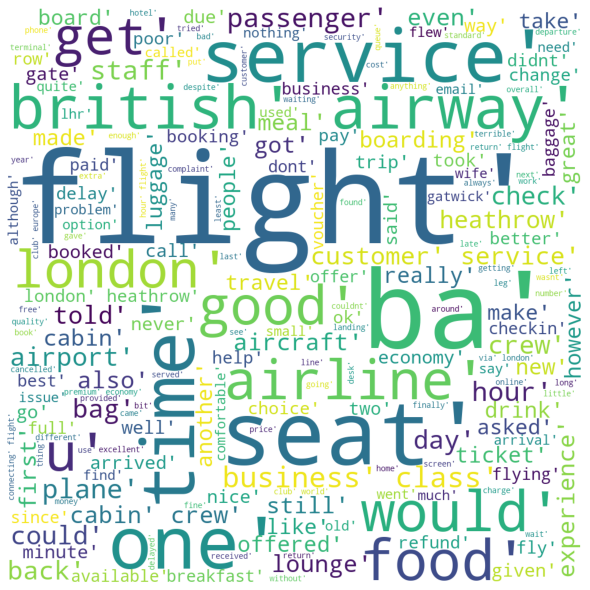

In [27]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
commented_words = ''
for val in df.reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    commented_words += " ".join(tokens)+" "
commented_words

'everything was ok until our connecting flight in london just before take off we were on the runway the pilot came on to announce an engine problem after engineers tried to fix it while we waited on the plane for over an hour we were finally told that we would have to be evacuated and rebooked for another flight but not to worry because a special crew was waiting for us on the ground to help us and set us up in a hotel except that there was no one to help us in fact everyone refused to help us it was saturday almost 8pm and they just wanted to go home anyone with a connecting flight couldnt rebook on the application because the app wouldnt disassociate our first flight with the connecting one in london and the staff saw this but still refused to help us they gave us a phone number but there was only a message that said just to use the app finally i got someone on the phone who rebooked us for the next day now its 1030pm and i have to find a hotel room because the airline refused also t

In [31]:
p_1 = TextBlob(commented_words).sentiment.polarity

#Determining the Subjectivity
s_1 = TextBlob(commented_words).sentiment.subjectivity

print("Polarity ", p_1)
print("Subjectivity ", s_1)

Polarity  0.08759949955129144
Subjectivity  0.48572472275023215


In [35]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
sent_1 = sentiment.polarity_scores(comment_words)
print("Sentiment:", sent_1)

Sentiment: {'neg': 0.109, 'neu': 0.726, 'pos': 0.166, 'compound': 1.0}
